# Data Science project
## **Analyzing FIFA 19 players dataset**


Source: https://www.kaggle.com/karangadiya/fifa19

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

Reading the csv data

In [2]:
#reading CSV data
df = pd.read_csv('data.csv')

Cleaning and adjusting the data

In [3]:
#identifing null values
df.isnull().values.any()

True

In [4]:
#columns with format to adjust
list_columns_to_adj = ['Value','Wage','Release Clause']
df[list_columns_to_adj] = df[list_columns_to_adj].fillna('€'+'0'+'K')

In [5]:
#function to adjust the format
def value_columns_adj (list_):
    for i in list_:
        df['i_order'] = ([x[-1] for x in df[i]])
        df['i_order'] = df['i_order'].replace({'M': float(1000000), 'K': float(1000),'0' :float(0)})
        df[i] = (pd.to_numeric([x[1:-1] for x in df[i]], errors='coerce')) * np.array(df['i_order'])
        df.drop("i_order", axis=1, inplace=True)


In [6]:
#call of the function to adjust the format
value_columns_adj(list_columns_to_adj)

Creation of the 'SimplifiedPosition' column

In [7]:
#update of the position field with proper name
def filter_(x):
    a = ['GK']
    b = ['LWB','RWB','LB','LCB','CB','RCB','RB']
    c = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM']
    d = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
    if x in a:
        return 'Goalkeeper'
    elif x in b:
        return 'Defenders'
    elif x in c:
        return 'Midfielder'
    elif x in d:
        return 'Attacker'
    else:
        return 'NaN'
df['SimplifiedPosition'] = df['Position'].apply(filter_)

Saving the file in pickle once is adjusted

In [8]:
# run this once just to save the cleaned df
pickle.dump(df, open("df.pickle", "wb"))

In [10]:
df = pickle.load(open("df.pickle", "rb"))

## Distribution of the players per position
The distribution shows the players per position, as expected there are more midfielders and defenders than attackers and goalkeepers. 

Text(0.5,1.08,'Number of players per position')

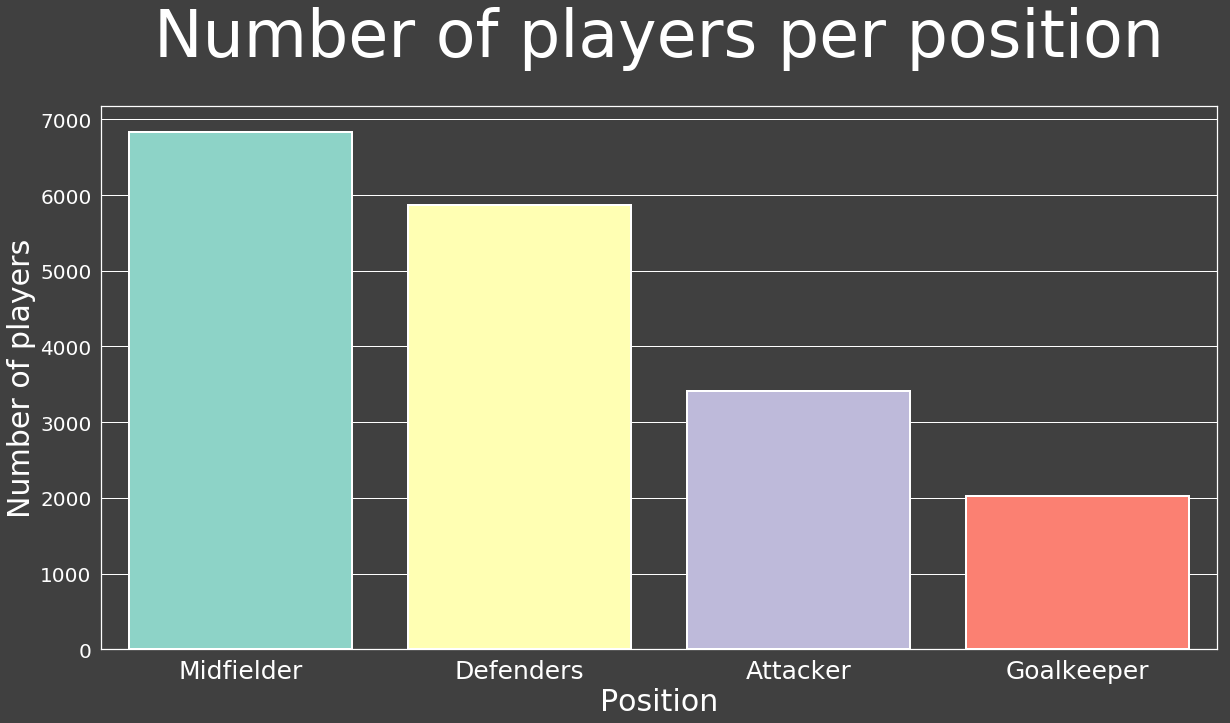

In [11]:
#position distribution

bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

df_temp = df[df['SimplifiedPosition'] != 'NaN']
p= sns.countplot(data=df_temp, 
                 x='SimplifiedPosition',
                 palette="Set3",
                 saturation =1,
                 linewidth=2,
                 order=df_temp['SimplifiedPosition'].value_counts().sort_values(ascending=False).index)

p.axes.xaxis.label.set_text("Position")
p.axes.yaxis.label.set_text("Number of players")
p.get_legend()
p.set_title("Number of players per position",fontsize = 65, color='white',y=1.08)


## Top10 players by wage

In [12]:
# adjusting dates columns
df[['Joined']] = pd.to_datetime(df['Joined'],infer_datetime_format=True)

In [13]:
# adjusting dates columns
df[['Contract Valid Until']] = pd.to_datetime(df['Contract Valid Until'],infer_datetime_format=True)

In [14]:
#check columns dates format
# df[['Joined', 'Contract Valid Until']].head()

Text(0.5,1.08,'Top10 players by wage')

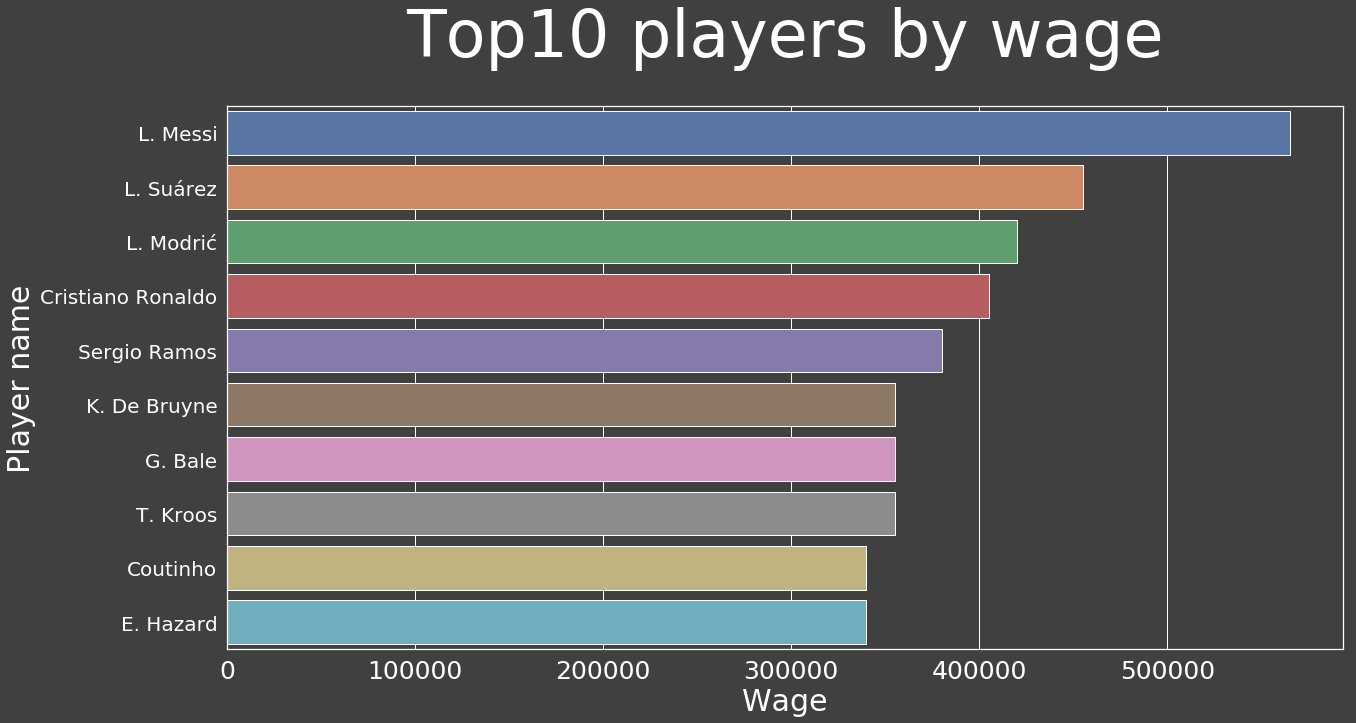

In [15]:
# top10players by wage
df_temp= df[['Wage','Name']].sort_values(by=['Wage'], ascending = False).head(10)

bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p= sns.barplot(x= 'Wage', 
               y= 'Name', 
               data=df_temp)

p.axes.xaxis.label.set_text("Wage")
p.axes.yaxis.label.set_text("Player name")
p.get_legend()
p.set_title("Top10 players by wage",fontsize = 65, color='white',y=1.08)

## Wage VS value distribution
The Wage VS value distribution shows that most of the players have low wage and value compared with the highest in class. On the other hand, the distribution is also symmetric with a low level of dispersion, so for most of the players there is a direct correlation between wage and value. 

Text(0.5,1.08,'Wage VS Value distributiuon')

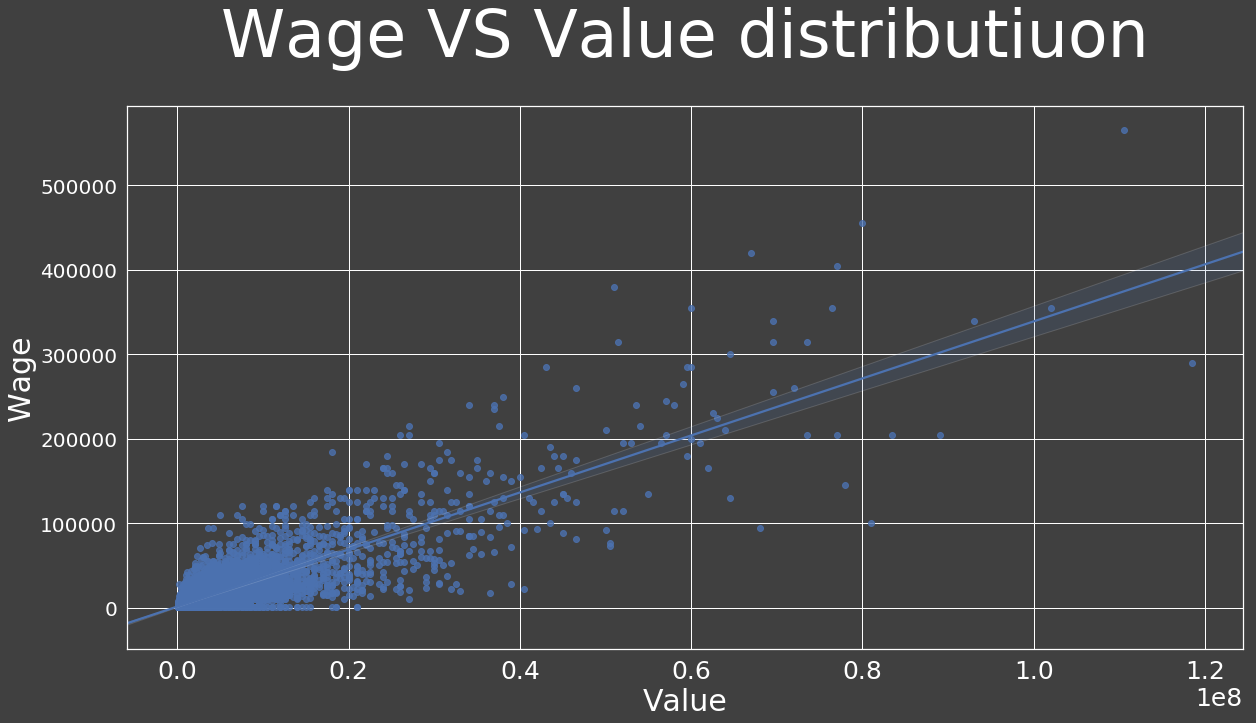

In [16]:
# wage VS value distribution 
p = sns.regplot('Value', 'Wage', data= df) 

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p.axes.xaxis.label.set_text("Value")
p.axes.yaxis.label.set_text("Wage")
p.get_legend()
p.set_title("Wage VS Value distributiuon",fontsize = 65, color='white',y=1.08)


## Distribution of the overall parameter VS value
The distribution of the overall parameter VS the value reflects shows a high concentration of players with overall between 70 and 85 and value between 0.1 1e8 and 0.4 1e8  

Text(0.5,1.08,'Overall parameter VS Value distributiuon')

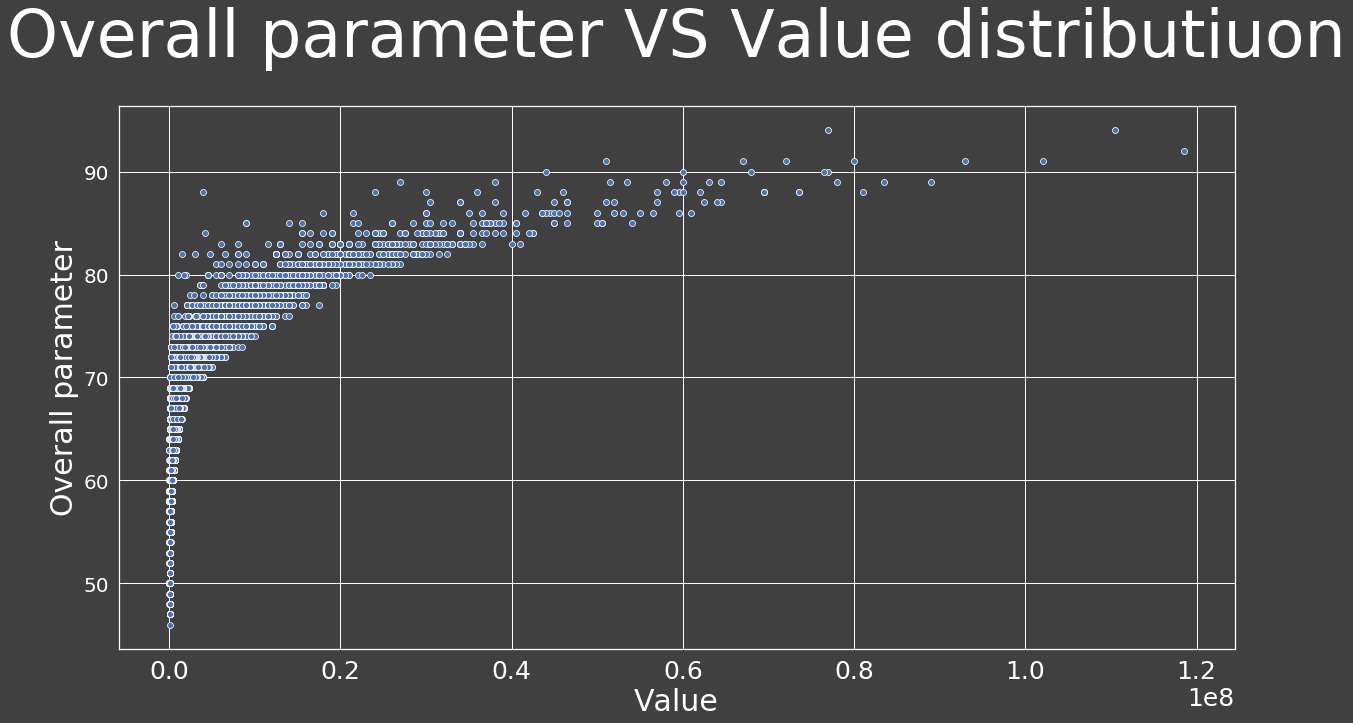

In [17]:
# value distribution
p = sns.scatterplot('Value', 'Overall', data= df) 

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p.axes.xaxis.label.set_text("Value")
p.axes.yaxis.label.set_text("Overall parameter")
p.get_legend()
p.set_title("Overall parameter VS Value distributiuon",fontsize = 65, color='white',y=1.08)


## Top10 nations per value
The top10 nations per value chart shows that the most important and famous country teams are also the ones with higher value.

Text(0.5,1.08,'TOP10 Nations per value')

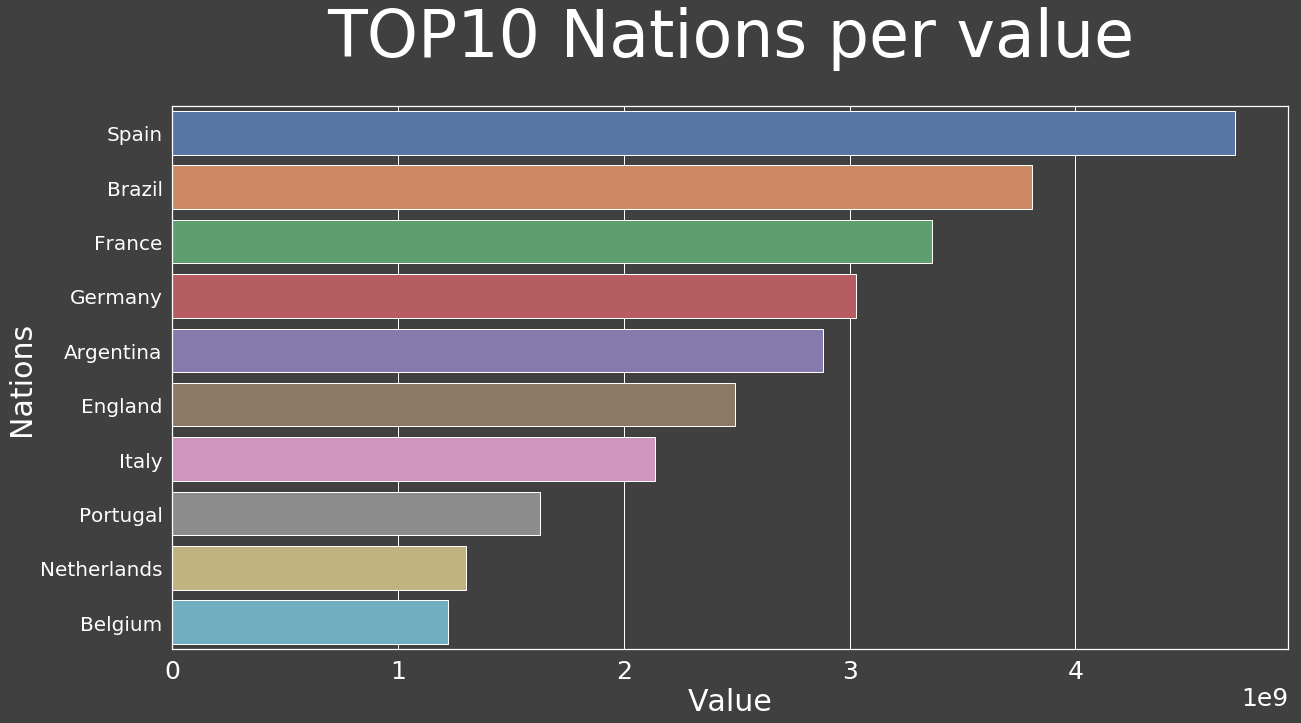

In [18]:
# top10 nations by value
top10nations= df.groupby('Nationality').sum().sort_values(by='Value',ascending =False).head(10).reset_index()
p = sns.barplot(x= 'Value', y= 'Nationality', data=top10nations)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p.axes.xaxis.label.set_text("Value")
p.axes.yaxis.label.set_text("Nations")
p.get_legend()
p.set_title("TOP10 Nations per value",fontsize = 65, color='white',y=1.08)


## Top10 clubs by value
The Top10 clubs by value shows the most important team in the World, surprisingly are missing the last two Champions League finalists: Liverpool and Ajax. 

Text(0.5,1.08,'TOP10 clubs by value')

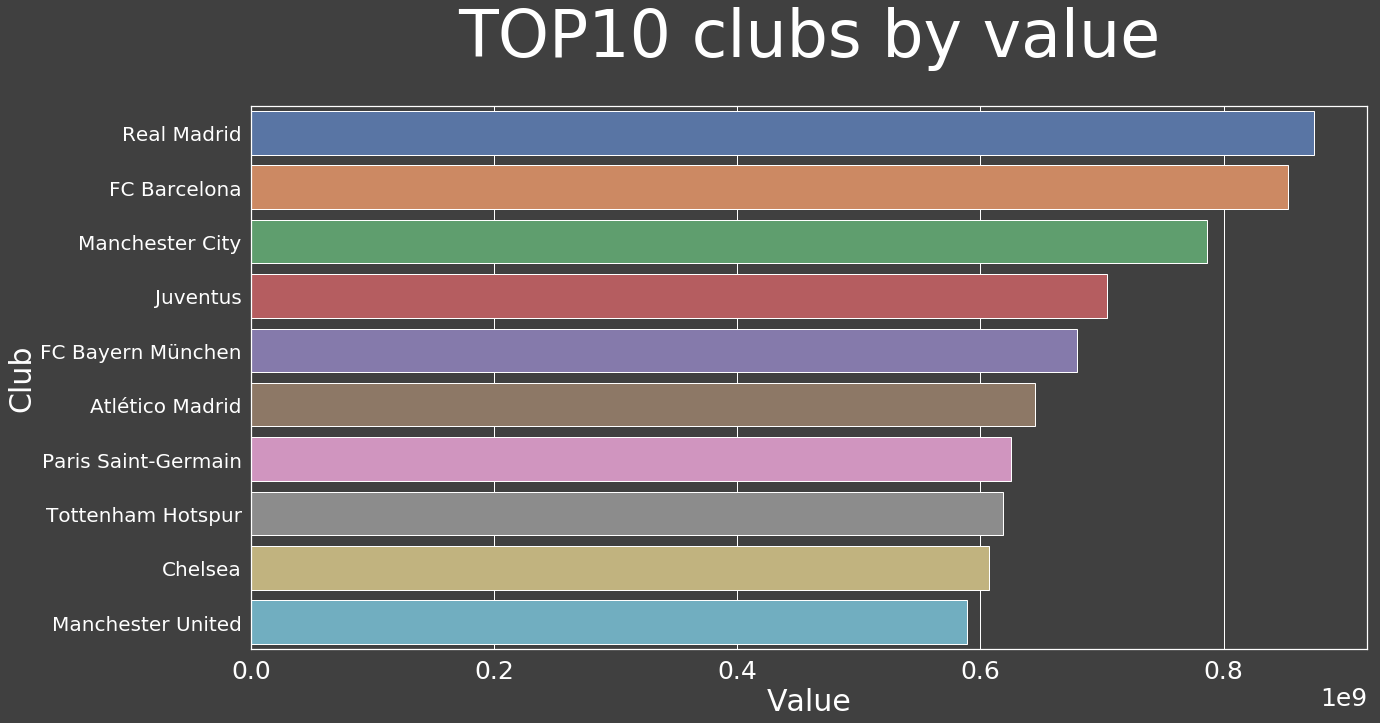

In [19]:
# top10 clubs by value
top10clubs= df.groupby('Club').sum().sort_values(by='Value',ascending =False).head(10).reset_index()
p= sns.barplot(x= 'Value', y= 'Club', data=top10clubs)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p.axes.xaxis.label.set_text("Value")
p.axes.yaxis.label.set_text("Club")
p.get_legend()
p.set_title("TOP10 clubs by value",fontsize = 65, color='white',y=1.08)

## Top10 clubs by players in the 90th percentile value

Text(0.5,1.08,'TOP10 clubs by players in the 90th percentile value')

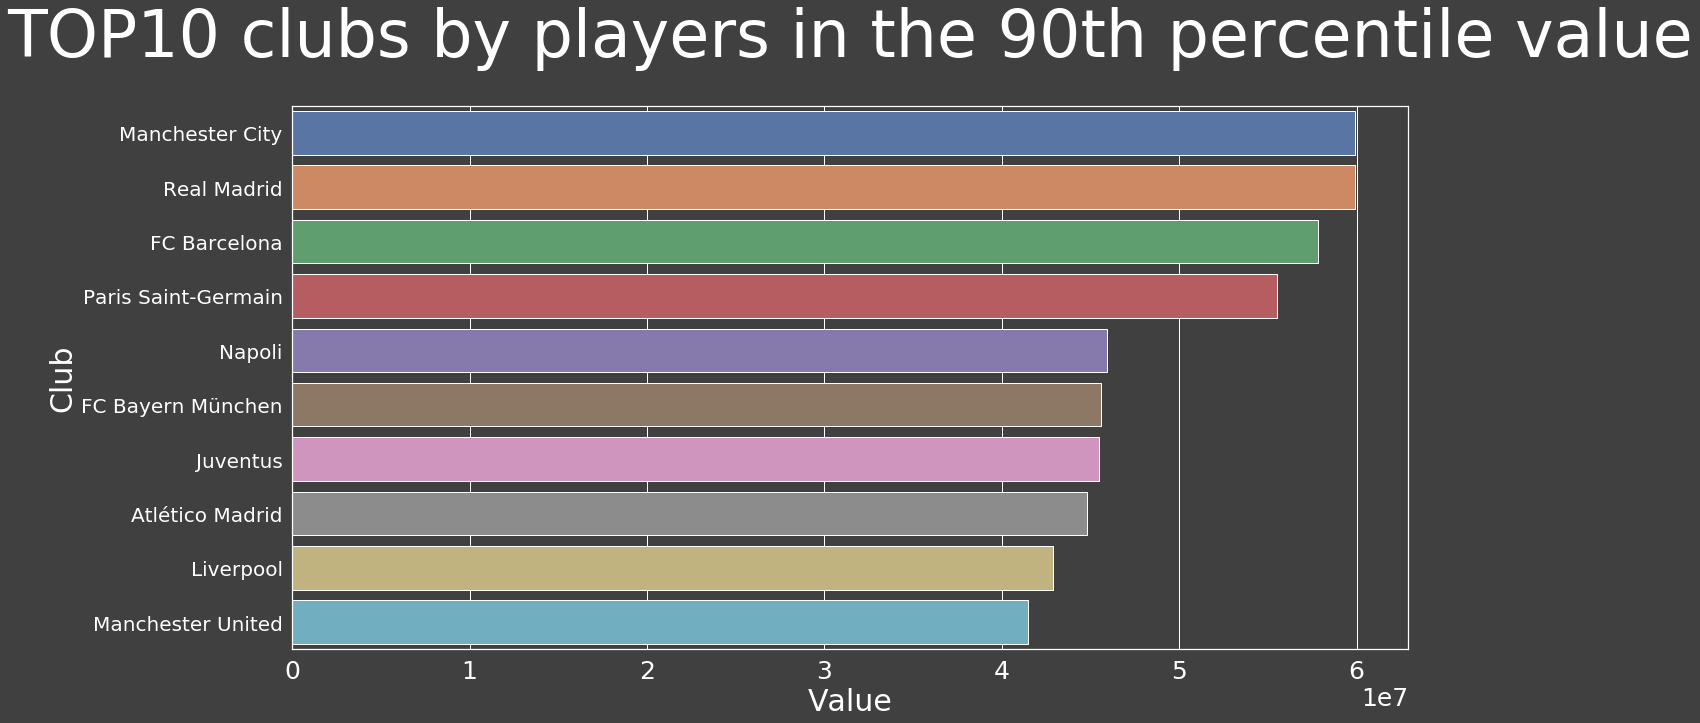

In [20]:
# top10 clubs per value with palyers in the 90th quantile value
topclubs = df.groupby('Club')['Value'].apply(lambda g: g.quantile(.9)).sort_values(ascending=False).reset_index().head(10)
p = sns.barplot(x= 'Value', y= 'Club', data=topclubs)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p.axes.xaxis.label.set_text("Value")
p.axes.yaxis.label.set_text("Club")
p.get_legend()
p.set_title("TOP10 clubs by players in the 90th percentile value",fontsize = 65, color='white',y=1.08)

## Top10 players per growth potential
The growth potential is obtained as difference between the potential and the overall value of a player. Of course, this measure has a certain degree of approximation.

Text(0.5,1.08,'TOP10 players per growth potential')

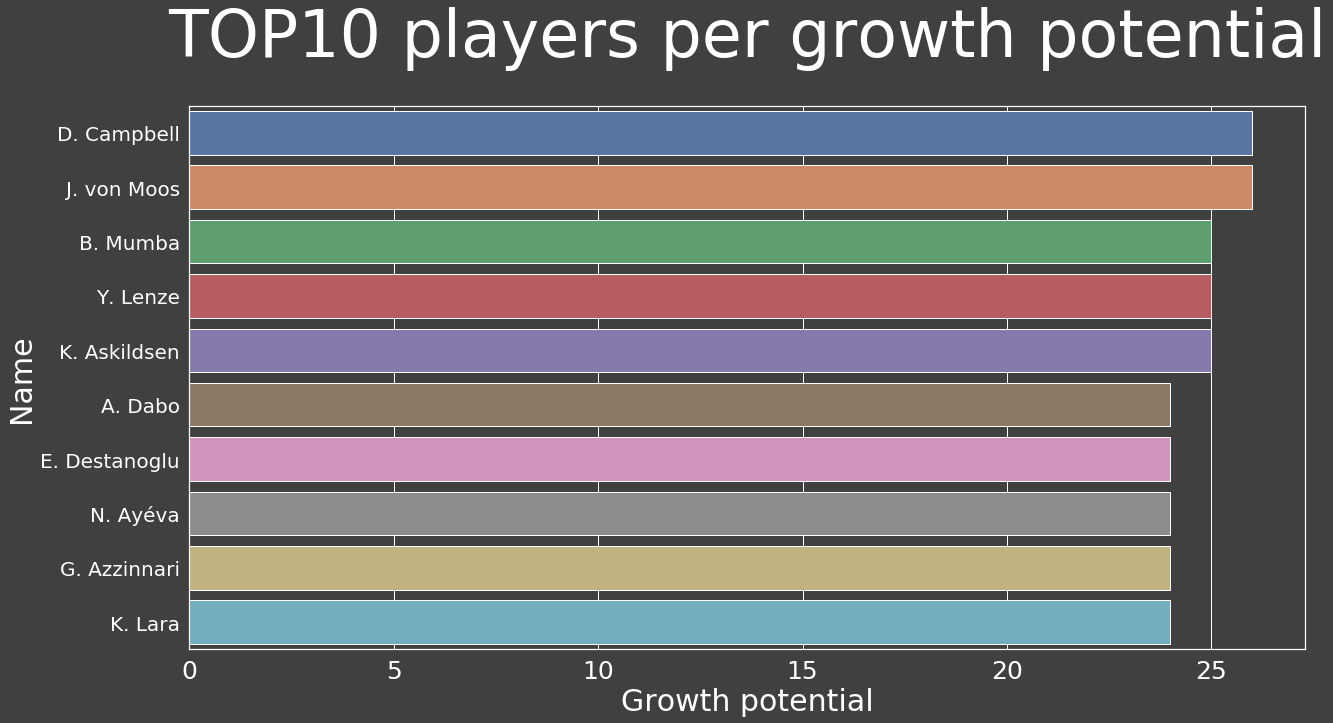

In [21]:
#growth potential value
df['Growth Potential'] = abs(df['Potential']-df['Overall'])
toppot = df[['Name','Growth Potential']].sort_values(by='Growth Potential', ascending = False).head(10)
p= sns.barplot(x= 'Growth Potential', y= 'Name', data=toppot)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p.axes.xaxis.label.set_text("Growth potential")
p.axes.yaxis.label.set_text("Name")
p.get_legend()
p.set_title("TOP10 players per growth potential",fontsize = 65, color='white',y=1.08)

## Top10 players per growth potential with potential over 90

Text(0.5,1.08,'TOP10 players per growth potential with potential over 90')

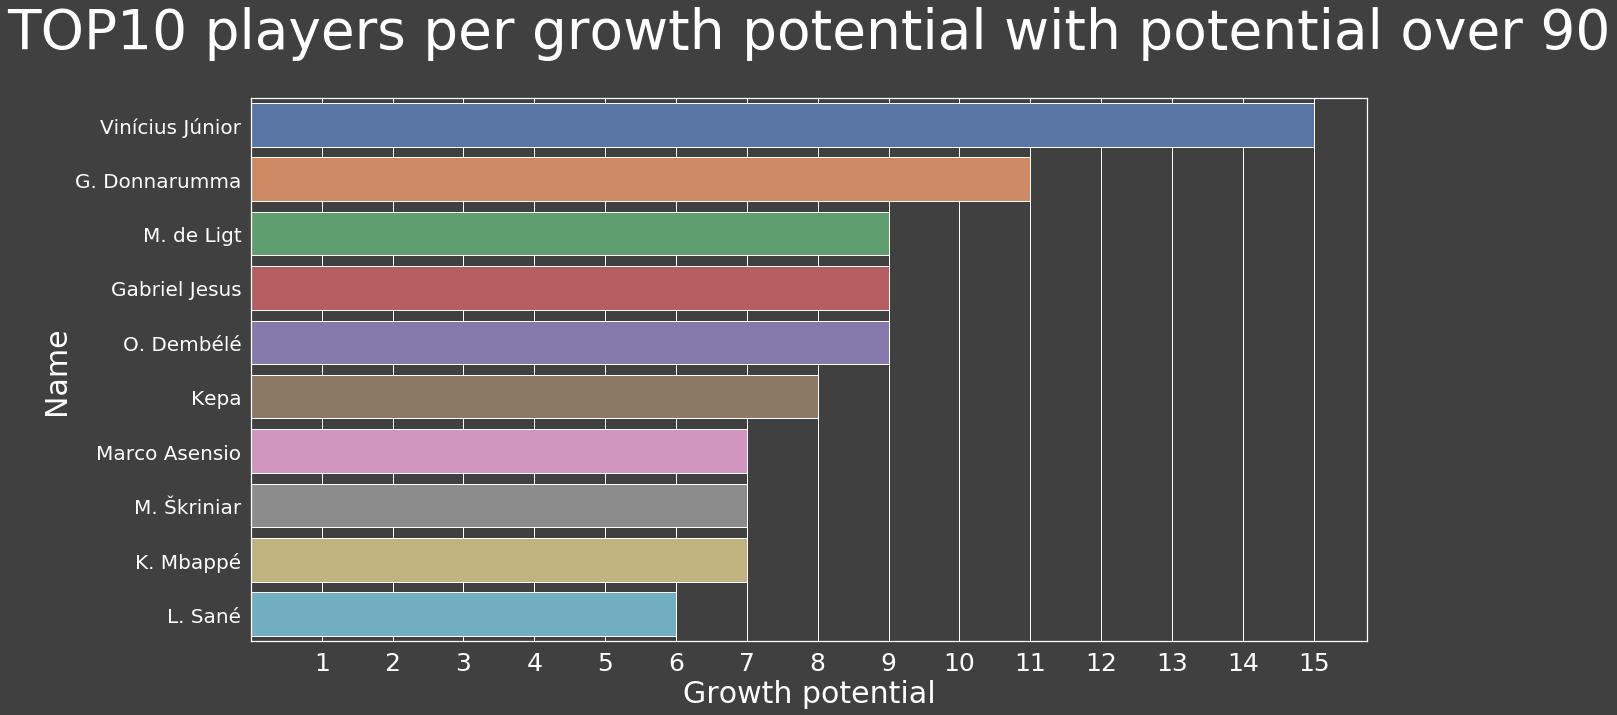

In [22]:
# top 10 player per growth potential with potential over 90
toppot_2 = df[df['Potential']>90]
toppot_2 = toppot_2[['Name','Growth Potential']].sort_values(by='Growth Potential', ascending = False).head(10)
p = sns.barplot(x= 'Growth Potential', y= 'Name', data=toppot_2)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

p.set_xticks(np.arange(1,toppot_2['Growth Potential'].max()+1,1))
p.axes.xaxis.label.set_text("Growth potential")
p.axes.yaxis.label.set_text("Name")
p.get_legend()
p.set_title("TOP10 players per growth potential with potential over 90",fontsize = 55, color='white',y=1.08)

## Top10 teams per players loaned

Text(0.5,1.08,'TOP10 teams per players loaned')

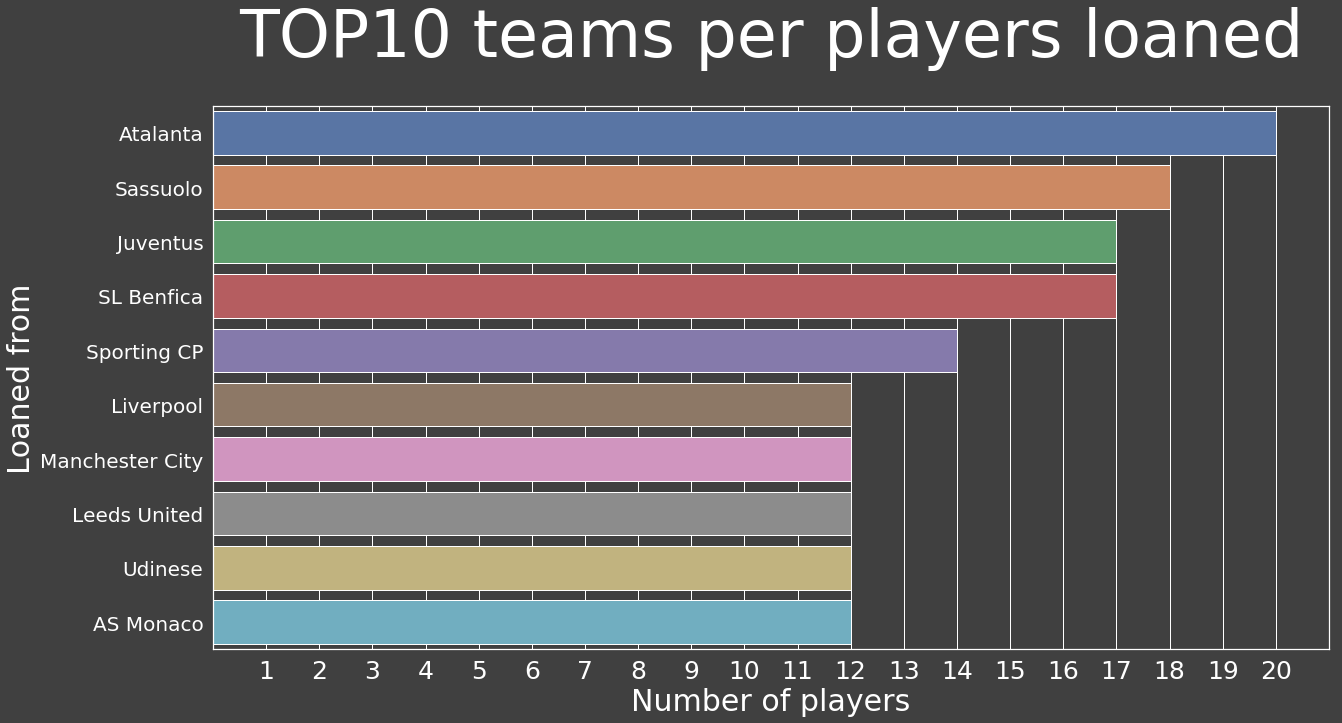

In [23]:
# TOP10 teams per players loaned
loaned = df.groupby('Loaned From')['Name'].count().sort_values(ascending = False).reset_index().head(10)
p = sns.barplot(x= 'Name', y= 'Loaned From', data=loaned)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20,
            })
p.set_xticks(np.arange(1,loaned['Name'].max()+1,1))
p.axes.xaxis.label.set_text("Number of players")
p.axes.yaxis.label.set_text("Loaned from")
p.get_legend()
p.set_title("TOP10 teams per players loaned",fontsize = 65, color='white',y=1.08)

## Players comparison with user-defined characteristics 

This chart is a comparison of players by a set of characteristics.

In [24]:
df = df.set_index('Name')

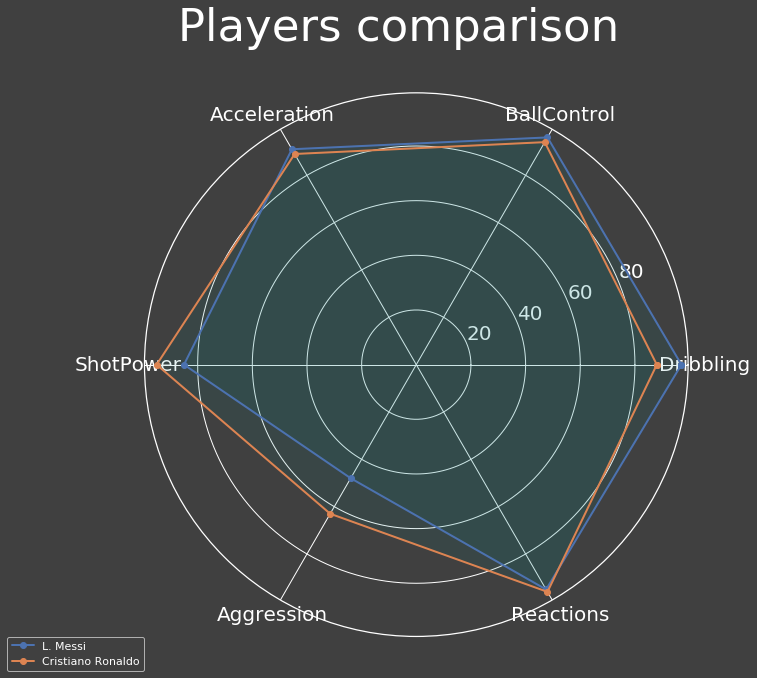

In [30]:
def plot_radar(player_names, features):
    fig=plt.figure()
    ax = fig.add_subplot(111, polar=True)
    for i in player_names:
        labels=np.array(features)
        angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        stats= df.loc[i,labels].values
        stats=np.concatenate((stats,[stats[0]]))
        angles=np.concatenate((angles,[angles[0]]))
        ax.plot(angles, stats, 'o-', linewidth=2, label = i)
        ax.fill(angles, stats, 'teal',alpha=0.1)
        ax.set_thetagrids(angles * 180/np.pi, labels)
        ax.get_xticklabels()
        for label,rot in zip(ax.get_xticklabels(),angles):
            label.set_rotation(rot*180./np.pi)
            label.set_horizontalalignment("center")
            label.set_rotation_mode("anchor")
        ax.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=(0.01, 0.01))
    plt.suptitle("Players comparison",fontsize = 45, color='white',y=1.00)

list_of_players = ['L. Messi','Cristiano Ronaldo']
list_of_features = ['Dribbling', 'BallControl', 'Acceleration', 'ShotPower','Aggression','Reactions']
    
p = plot_radar(list_of_players, list_of_features)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':20,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20,
            })




## Correlation matrix between all the characteristics
The matrix shows how some characteristics are not correlated with many others while others are. This is due to the intrinsic feature of the soccer, for instance jumping is not fundamental while long passing is.

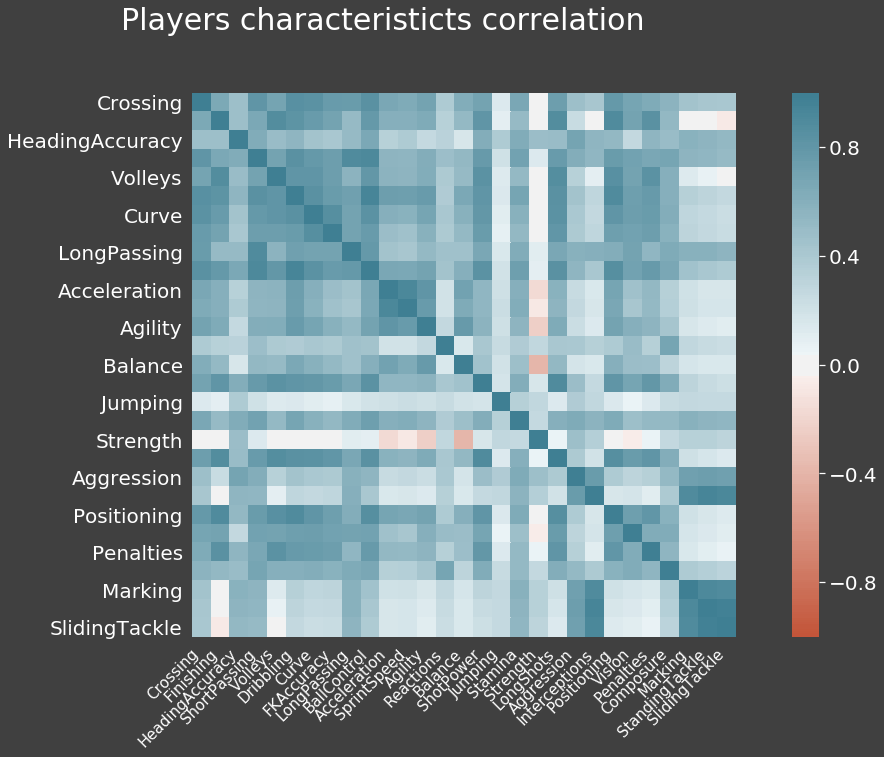

In [28]:
data = df[['Crossing',
    'Finishing',
    'HeadingAccuracy',
    'ShortPassing',
    'Volleys',
    'Dribbling',
    'Curve',
    'FKAccuracy',
    'LongPassing',
    'BallControl',
    'Acceleration',
    'SprintSpeed',
    'Agility',
    'Reactions',
    'Balance',
    'ShotPower',
    'Jumping',
    'Stamina',
    'Strength',
    'LongShots',
    'Aggression',
    'Interceptions',
    'Positioning',
    'Vision',
    'Penalties',
    'Composure',
    'Marking',
    'StandingTackle',
    'SlidingTackle']]
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20,
            })
plt.suptitle("Players characteristicts correlation",fontsize = 30, color='white',y=1.00)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize =15
);

## Correlation between overall value, value, wage and potential
This correlation matrix shows an expected high correlation between wage and value. The correlation factor between potential and value is not high probably because of the risks of assigning a potential score to young players, who do not always meet the expectations. Contrarily, there are players that flourish over the years but were not considered talented when they were young. Surprisingly, though, there is not a high correlation factor between value and overall value, this means that there are players with a good overall value not reflected in the value given in Fifa. It means there a bias between their real value and the sum of their characteristics.

Text(0.5,1,'Overall characteristicts correlation')

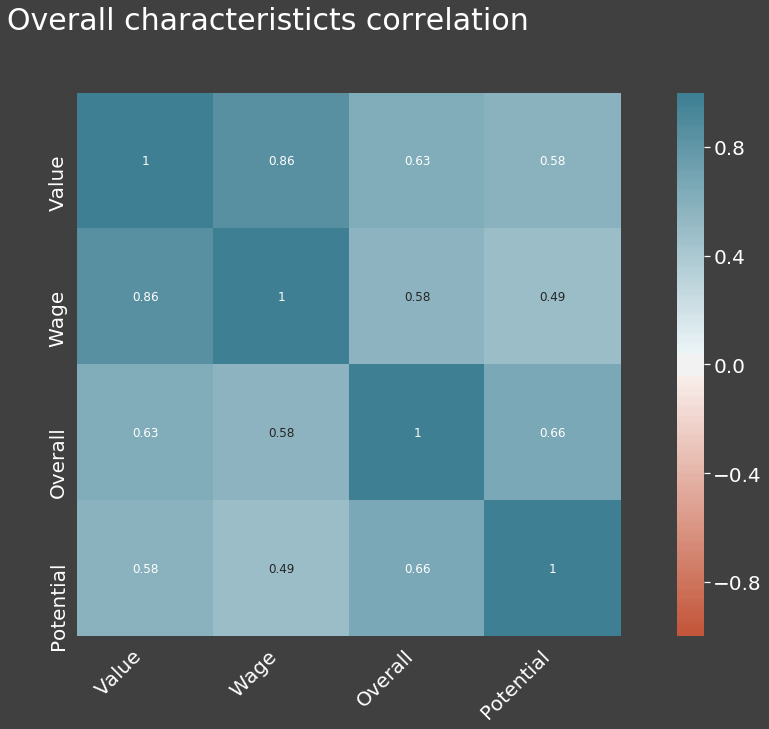

In [29]:
#correlation Value Wage Overall
data = df[['Value','Wage','Overall','Potential']]
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20,
            })

plt.suptitle("Overall characteristicts correlation",fontsize = 30, color='white',y=1.00)


## Correlation value, international reputation and release clause
The goal of this correlation matrix is to check the correlation between the value assigned, release clause amount and international reputation. 
The final correlation result shows a high correlation between value and release clause, so a player with a high release clause has probably also an higher value.
The lower correlation result between value and international reputation means that players can have a high value without an high recognition abroad. For instance, imagine a player which is determinant in a team but does not participate to international competitions.

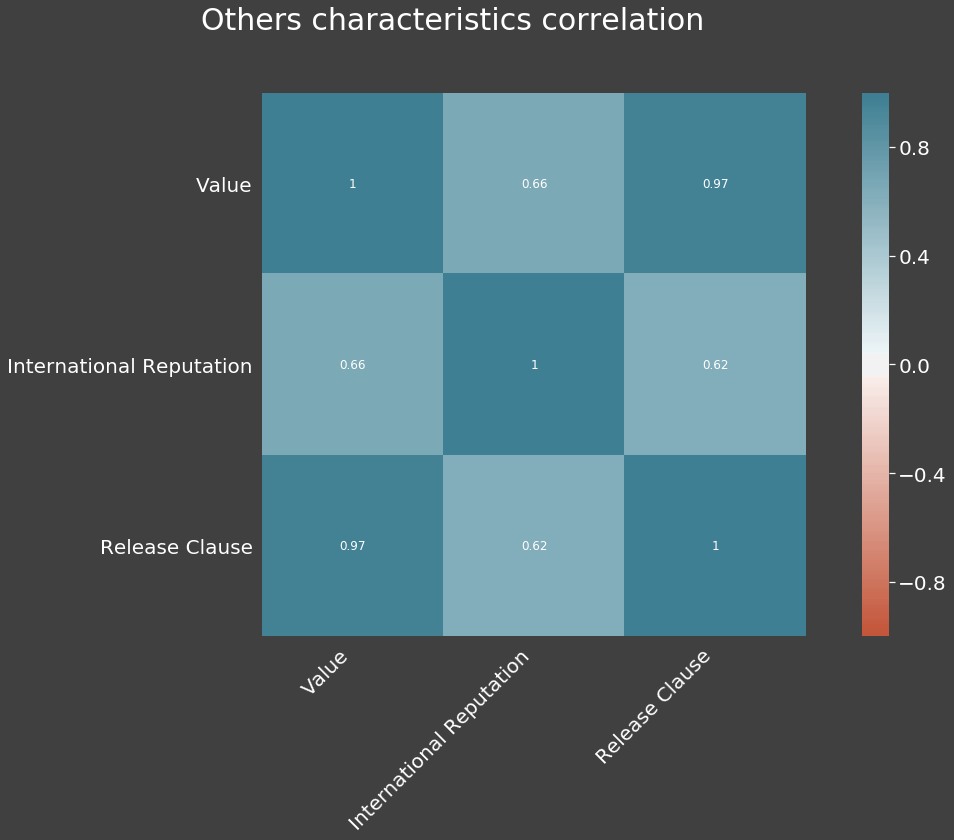

In [27]:
#correlation Value Wage Overall
data = df[['Value','International Reputation','Release Clause']]
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.suptitle("Others characteristics correlation",fontsize = 30, color='white',y=1.00)

sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":True,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20,
            })
